<a href="https://colab.research.google.com/github/biswajitmohanty/genai/blob/main/Handwriting_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the Dataset
> * MNIST ("Modified National Institute of Standards and Technology") is the “hello world” dataset of computer vision.   
> * Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.

## Task
> * To correctly identify digits from a dataset of handwritten images in the test dataset

# Libraries

In [ ]:
# for numerical analysis
import numpy as np
# to store and process in a dataframe
import pandas as pd

# for ploting graphs
import matplotlib.pyplot as plt
# advance ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Data

In [ ]:
# import train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
# training dataset
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# test dataset
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# looking for missing values
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


# EDA

### Label count

In [ ]:
train['label'].value_counts().sort_index()

,count
label,
0,4132
1,4684
2,4177
3,4351
4,4072
5,3795
6,4137
7,4401
8,4063


<ipython-input-8-1a8796f218a7>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


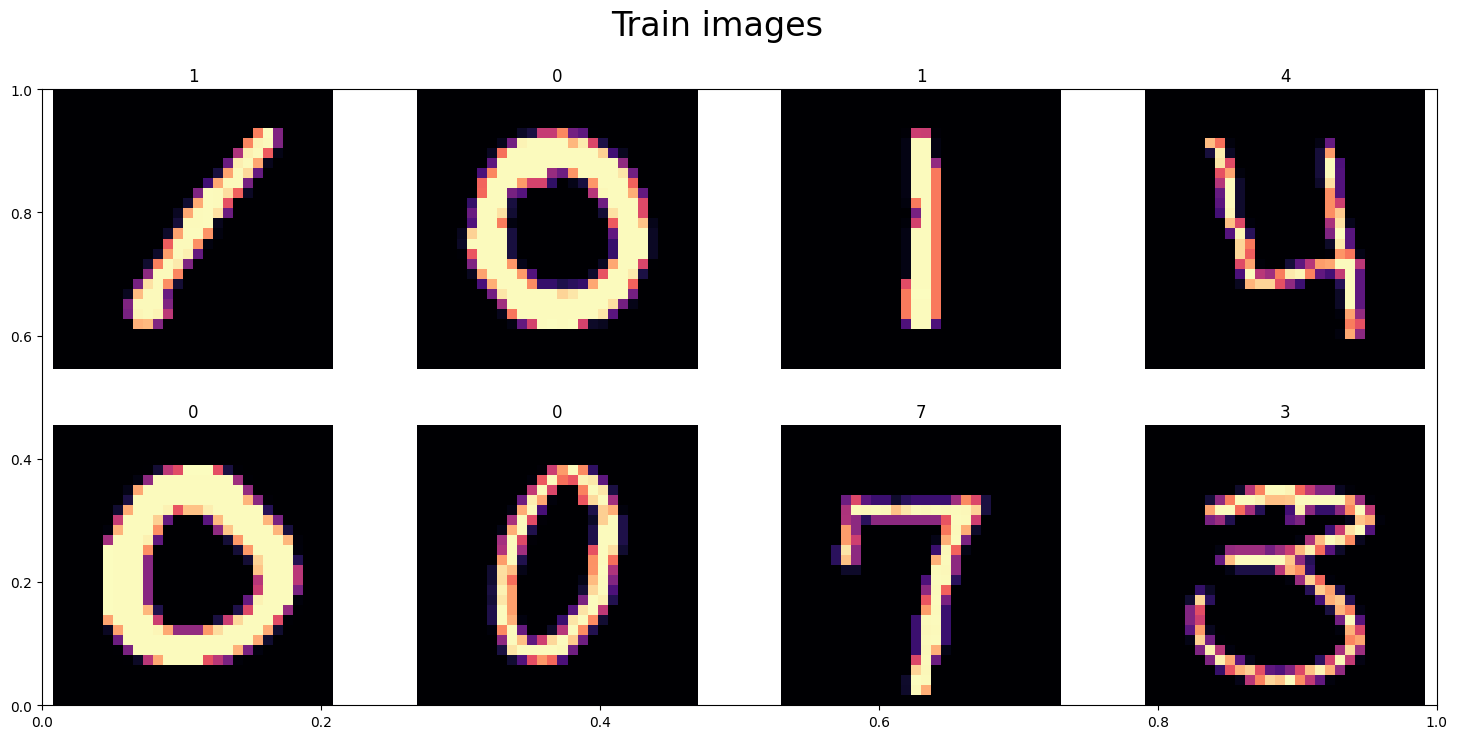

In [ ]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

> Test images doesn't have labels  
> We need to create a model to predict them

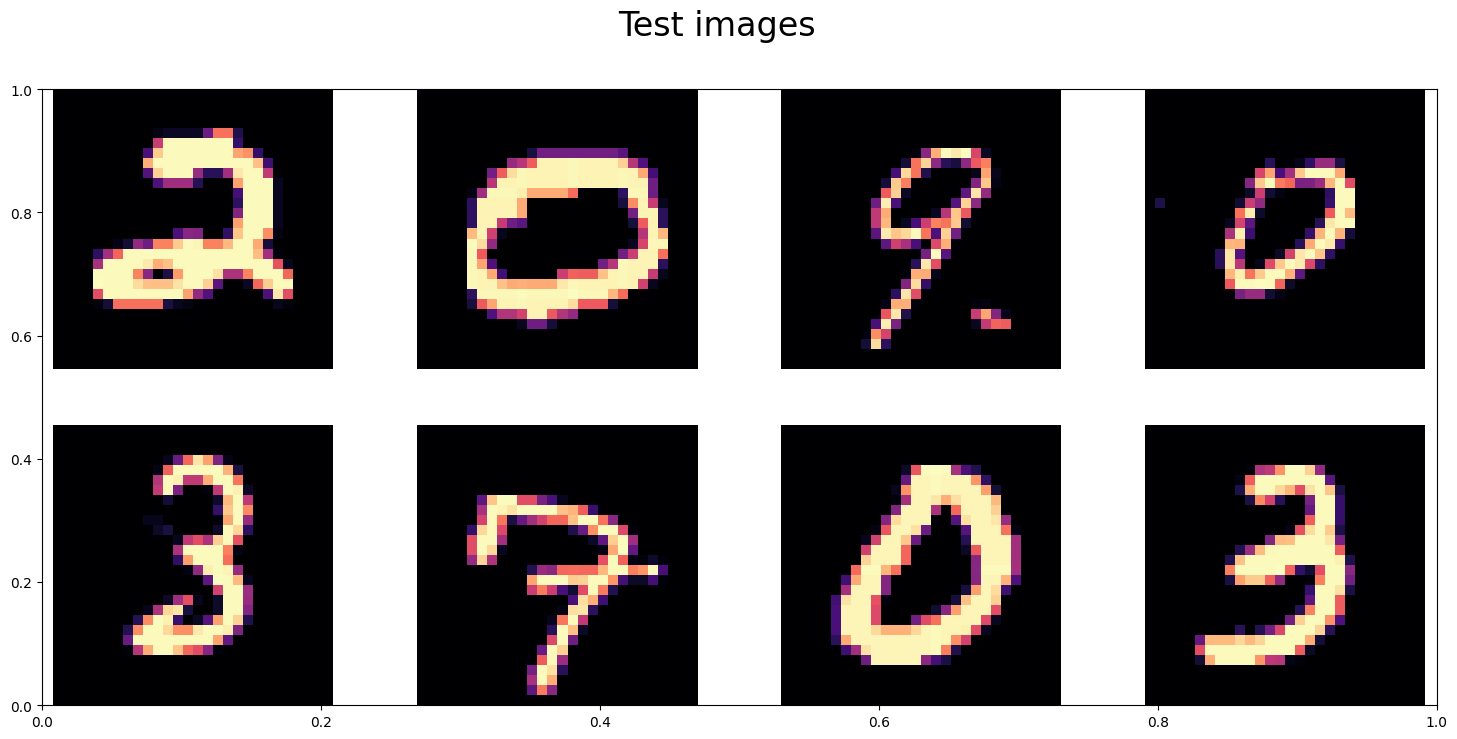

In [ ]:
# first few test images
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    img = row.to_numpy()[:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

# Preprocessing

In [ ]:
# split into image and labels and convert to numpy array
X = train.iloc[:, 1:].to_numpy()
y = train['label'].to_numpy()

# test dataset
test = test.loc[:, :].to_numpy()

for i in [X, y, test]:
    print(i.shape)

(42000, 784)
(42000,)
(28000, 784)


In [ ]:
# normalize the data

X = X / 255.0
test = test / 255.0

In [ ]:
# reshape dataset

# shape of training and test dataset
print(X.shape)
print(test.shape)

# reshape the dataframe to 3x3 matrix with 1 channel grey scale values
X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

# shape of training and test dataset
print(X.shape)
print(test.shape)

(42000, 784)
(28000, 784)
(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [ ]:
# one hot encode target

# shape and values of target
print(y.shape)
print(y[0])

# convert Y_train to categorical by one-hot-encoding
y_enc = to_categorical(y, num_classes = 10)

# shape and values of target
print(y_enc.shape)
print(y_enc[0])

(42000,)
1
(42000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# train test split

# random seed
random_seed = 2

# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_enc, test_size=0.3)

# shape
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(29400, 28, 28, 1)
(29400, 10)
(12600, 28, 28, 1)
(12600, 10)


## Plot images

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


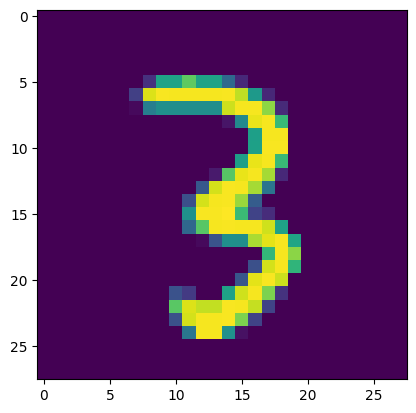

In [ ]:
g = plt.imshow(X_train[0][:,:,0])
print(y_train_enc[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


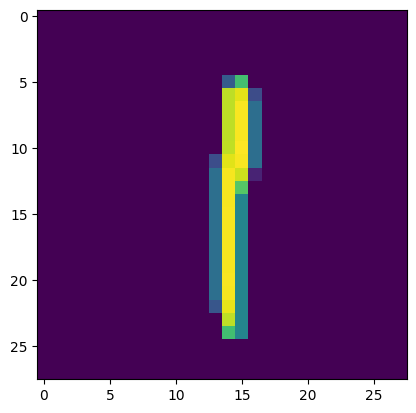

In [ ]:
g = plt.imshow(X_train[9][:,:,0])
print(y_train_enc[9])

# CNN

### Model parameters

In [ ]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

### Define CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

### Model fitting

In [ ]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
161/161 - 12s - 75ms/step - accuracy: 0.8102 - loss: 0.5908 - val_accuracy: 0.9613 - val_loss: 0.1252
Epoch 2/10
161/161 - 20s - 121ms/step - accuracy: 0.9536 - loss: 0.1558 - val_accuracy: 0.9777 - val_loss: 0.0749
Epoch 3/10
161/161 - 11s - 66ms/step - accuracy: 0.9679 - loss: 0.1063 - val_accuracy: 0.9796 - val_loss: 0.0652
Epoch 4/10
161/161 - 11s - 69ms/step - accuracy: 0.9750 - loss: 0.0801 - val_accuracy: 0.9822 - val_loss: 0.0542
Epoch 5/10
161/161 - 9s - 57ms/step - accuracy: 0.9806 - loss: 0.0638 - val_accuracy: 0.9828 - val_loss: 0.0552
Epoch 6/10
161/161 - 10s - 63ms/step - accuracy: 0.9838 - loss: 0.0550 - val_accuracy: 0.9849 - val_loss: 0.0497
Epoch 7/10
161/161 - 11s - 66ms/step - accuracy: 0.9861 - loss: 0.0444 - val_accuracy: 0.9873 - val_loss: 0.0397
Epoch 8/10
161/161 - 10s - 64ms/step - accuracy: 0.9878 - loss: 0.0412 - val_accuracy: 0.9870 - val_loss: 0.0414
Epoch 9/10
161/161 - 10s - 61ms/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.9854 - 

### Accuracy and loss

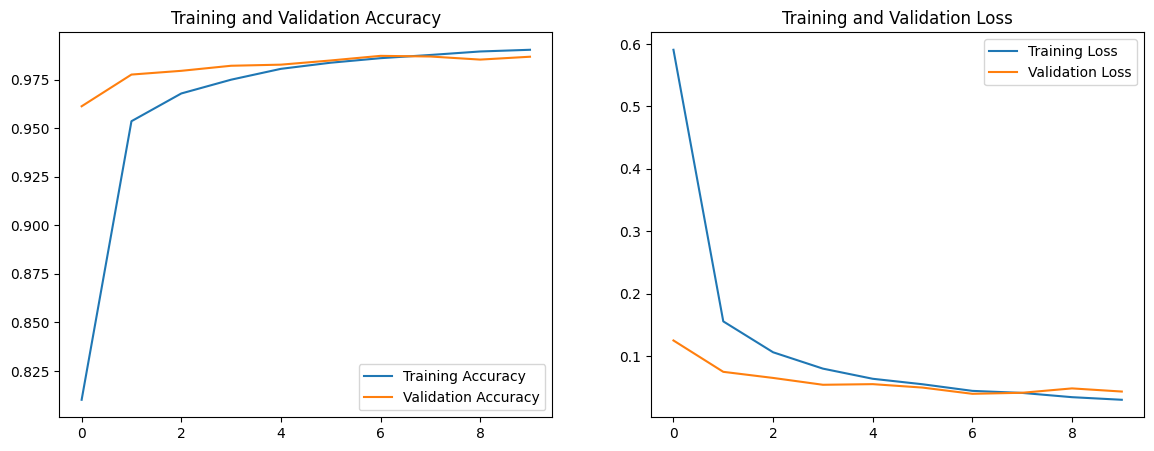

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

### Evaluating on validationa dataset

In [ ]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc, verbose=False)

[0.04735054448246956, 0.9873015880584717]

In [ ]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[6.43179732e-10 9.53333029e-07 1.35074805e-08 1.87225808e-08
 9.98135984e-01 1.29304367e-09 6.85782942e-09 3.70474045e-05
 1.27002068e-06 1.82472623e-03]
4


In [ ]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1188
           1       1.00      0.99      0.99      1423
           2       0.98      0.98      0.98      1255
           3       0.99      0.98      0.99      1275
           4       0.99      0.99      0.99      1201
           5       0.98      0.99      0.99      1151
           6       0.99      1.00      0.99      1257
           7       0.98      0.99      0.98      1325
           8       0.99      0.98      0.99      1229
           9       0.98      0.98      0.98      1296

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



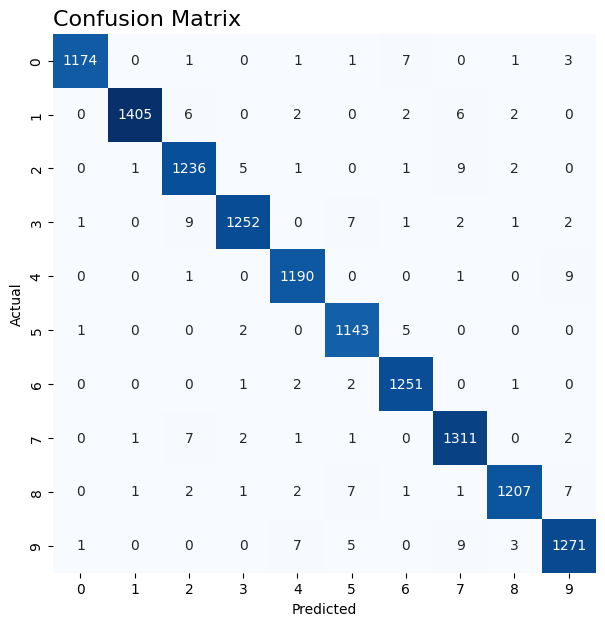

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Predicting on test

In [ ]:
# predicted values
y_pred_enc = model.predict(test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
[1.5780098e-09 2.9330441e-10 9.9999994e-01 3.2596903e-09 1.0624348e-09
 1.1104951e-13 2.6380183e-11 1.2037333e-09 4.8194625e-11 7.8756932e-12]
2


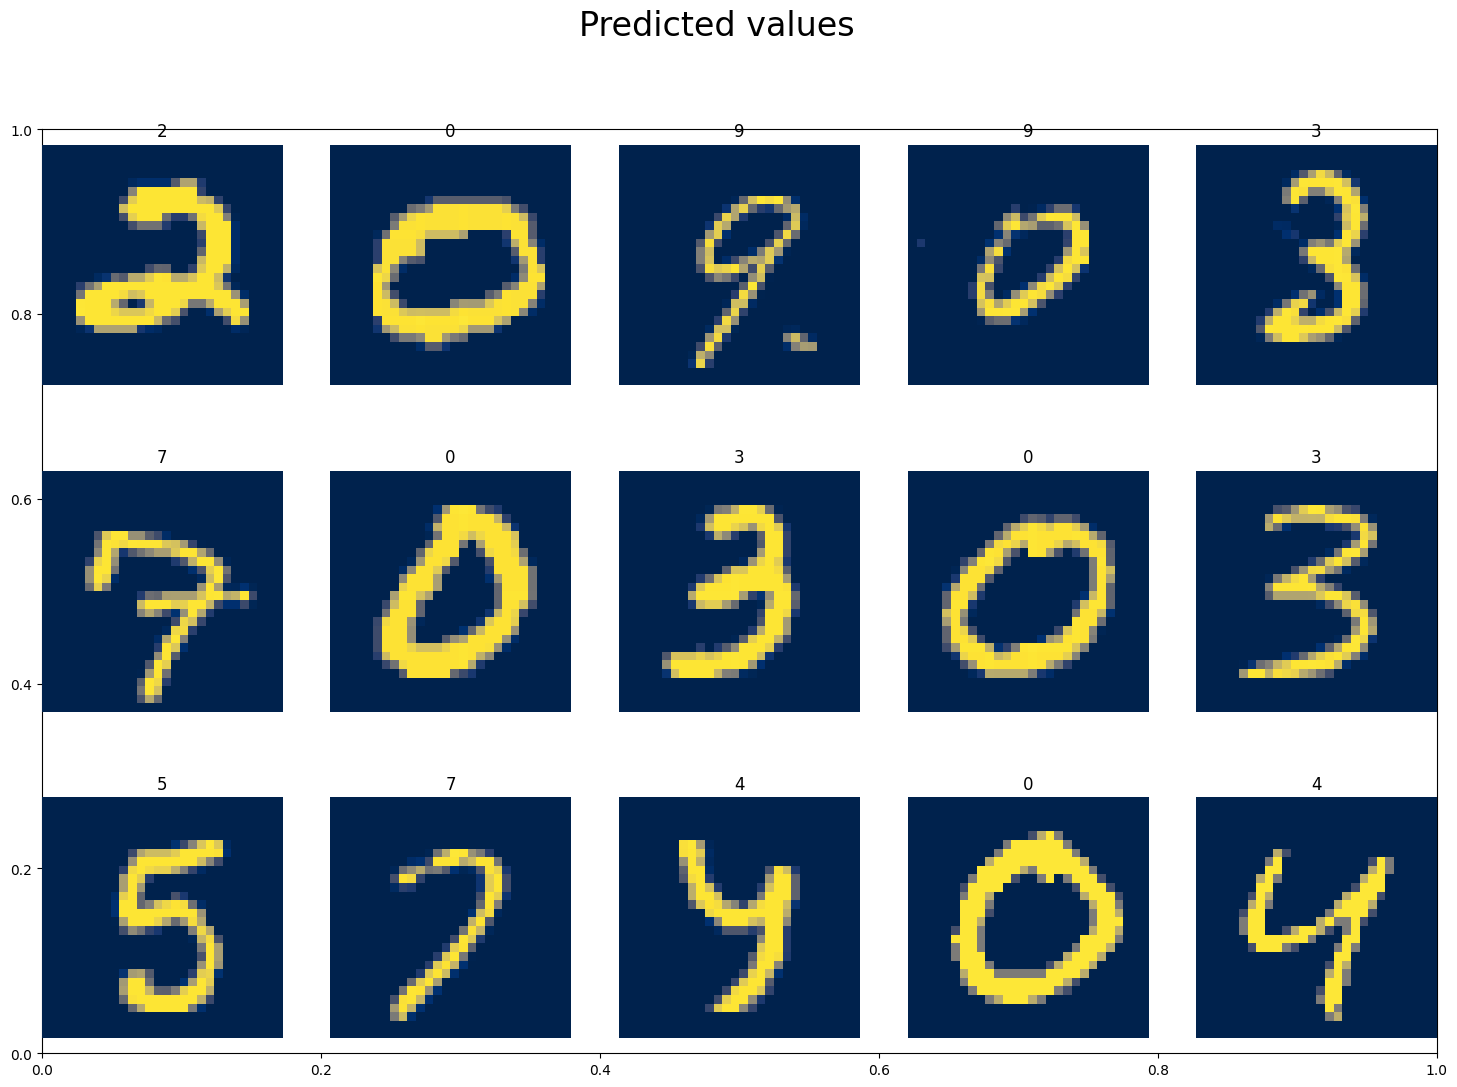

In [ ]:
# predicted targets of each images
# (labels above the images are predicted labels)
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(test[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')